# Movie Genre Data Analysis

## Introduction

We are going to focus highly on genres's. I want to know everything about Genre's. 

Here are some things I want to look at:

### Research Questions (Q):

1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. budget and revenue?
3. Which genres have high avg. profit?
4. Which genres have high avg. popularity?
5. Which genres have highest number of movies with a voting avg. >=8?

### Research Hypotheses (H): 

1. The best movies according to vote avg. return high profit and revenue. 
2. The best movies according to popularity return high profit and revenue. 
3. Highly budgeted movies return high revenue and profit. 
4. Highly budged movies have a high popularity. 

In [94]:
import pandas as pd

In [4]:
movies = pd.read_csv(r'/Users/indusen/Downloads/imdb_movies.csv')

In [5]:
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.rows', 22)

In [6]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [11]:
movies.drop_duplicates(inplace = True)

In [12]:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [13]:
movies.dropna(subset = ['genres'], inplace = True)

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [15]:
movies['profit'] = movies['revenue']- movies['budget']

In [17]:
movies_genre=movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]

In [19]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


In [55]:
from pandas import Series, DataFrame

In [26]:
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

#### Research Questions (Q):

1. Which genres are the most common (number of movies made)?


In [56]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = True)

In [50]:
genres_count

,original_title
genres_split,
Western,163
TV Movie,167
Foreign,188
War,269
History,331
Music,403
Documentary,520
Animation,697
Mystery,796


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

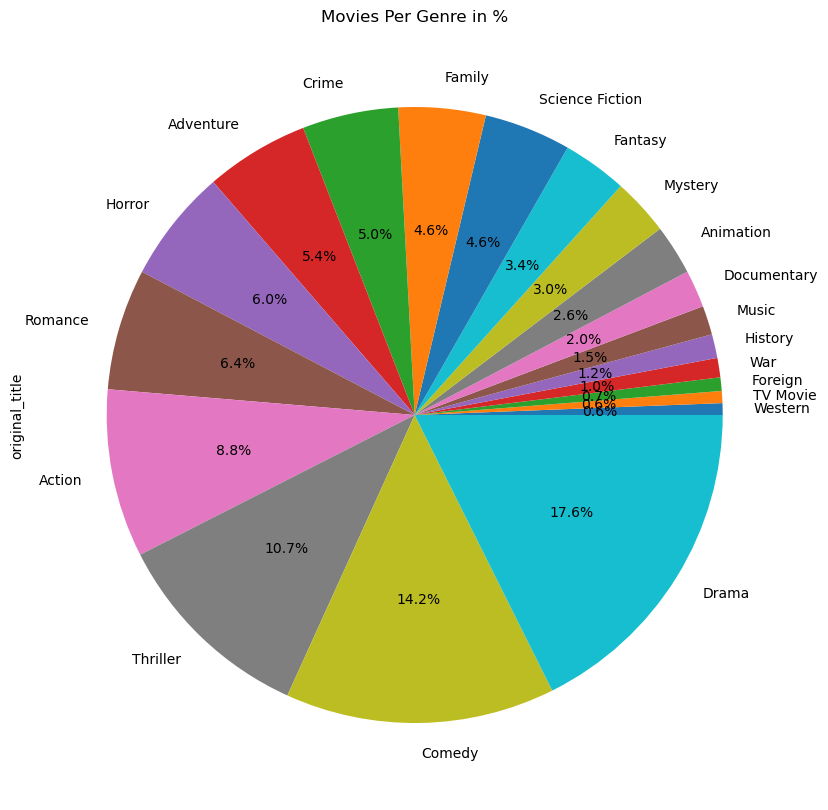

In [51]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct = '%1.1f%%', figsize=(10,10))

<Axes: title={'center': 'Movies Per Genre'}, ylabel='genres_split'>

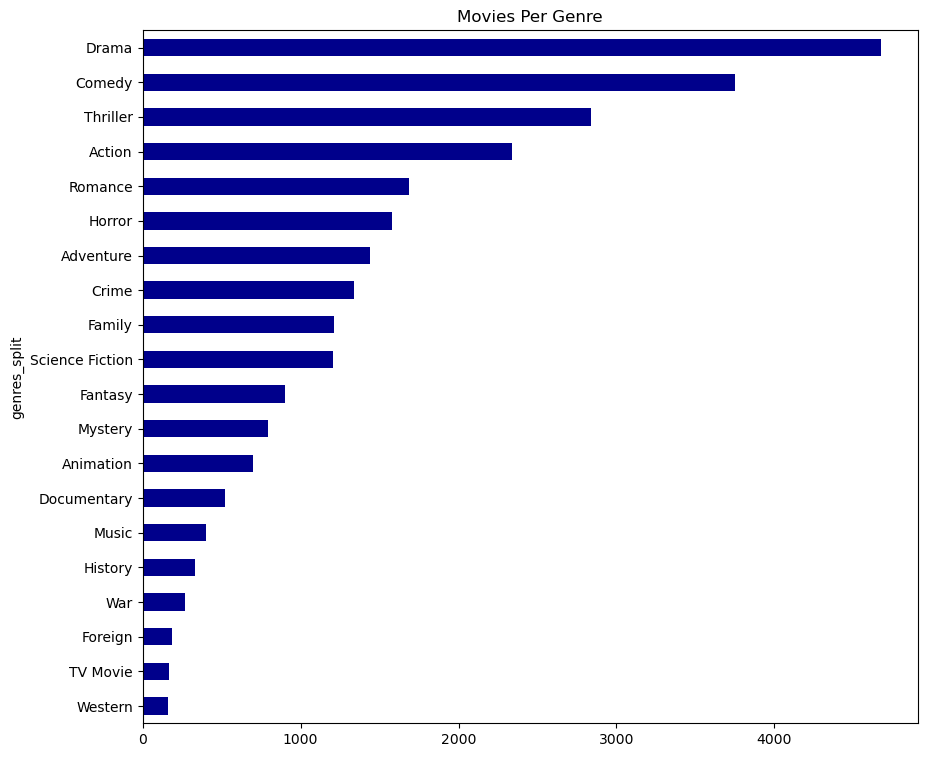

In [52]:
genres_count['original_title'].plot.barh(title = 'Movies Per Genre', color = 'DarkBlue', figsize = (10,9))

#### Research Questions (Q):

2. Which genres have high avg. budget and revenue?

In [60]:
genres_avg = movies_genre.groupby('genres_split').mean(numeric_only=True)
pd.options.display.float_format = '{:2f}'.format

genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624


In [62]:
genres_avg.sort_values('revenue', ascending = True, inplace = True)

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

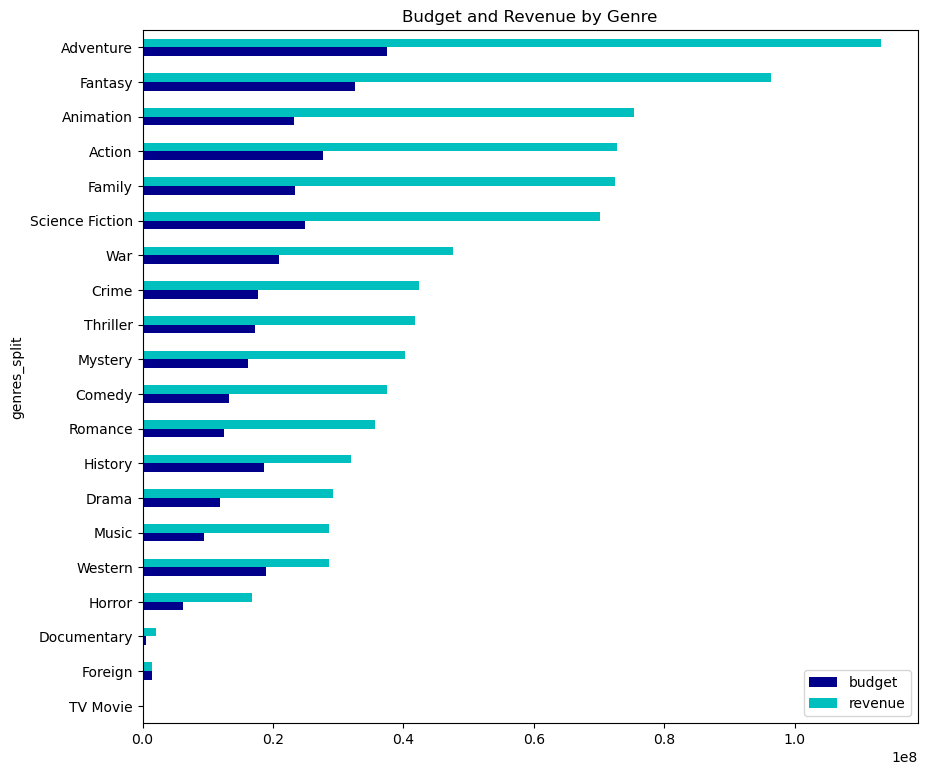

In [63]:
genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue','c'), figsize = (10,9))

#### Research Questions (Q):

3. Which genres have high avg. profit?

In [95]:
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Foreign,0.191496,1451434.925532,1520459.835106,107.228723,16.627660,5.981383,69024.909574
TV Movie,0.270896,267664.670659,251497.005988,91.982036,34.365269,5.788024,-16167.664671
Horror,0.465357,6226529.210751,16822808.624313,94.424557,120.059866,5.337447,10596279.413561
Music,0.487321,9438627.549020,28571768.691176,105.137255,124.340686,6.480392,19133141.142157
History,0.575936,18594919.302395,32011793.215569,136.206587,183.772455,6.410479,13416873.913174
Western,0.590615,18974107.975758,28568709.284848,117.575758,205.739394,6.083030,9594601.309091
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Romance,0.592082,12531271.847547,35691972.327103,106.891355,166.070678,6.042874,23160700.479556


In [67]:
genres_avg.sort_values('profit', ascending = True, inplace = True)

<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

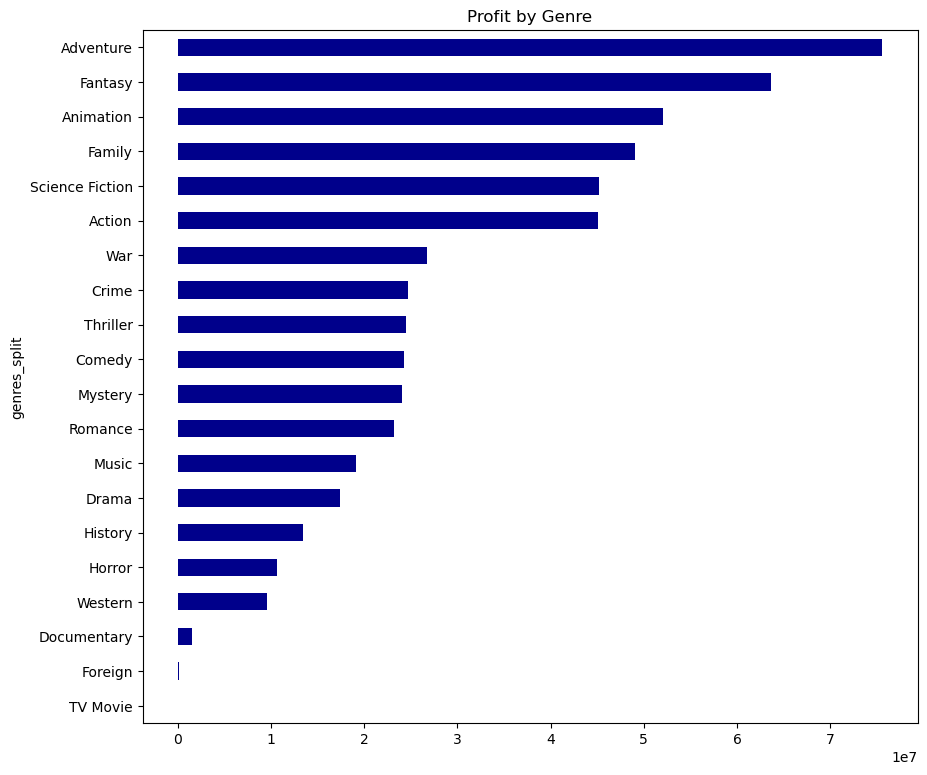

In [68]:
genres_avg['profit'].plot.barh(title = 'Profit by Genre', color = 'DarkBlue',figsize = (10,9))

#### Research Questions (Q):

4. Which genres have high avg. popularity?

In [96]:
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Foreign,0.191496,1451434.925532,1520459.835106,107.228723,16.627660,5.981383,69024.909574
TV Movie,0.270896,267664.670659,251497.005988,91.982036,34.365269,5.788024,-16167.664671
Horror,0.465357,6226529.210751,16822808.624313,94.424557,120.059866,5.337447,10596279.413561
Music,0.487321,9438627.549020,28571768.691176,105.137255,124.340686,6.480392,19133141.142157
History,0.575936,18594919.302395,32011793.215569,136.206587,183.772455,6.410479,13416873.913174
Western,0.590615,18974107.975758,28568709.284848,117.575758,205.739394,6.083030,9594601.309091
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Romance,0.592082,12531271.847547,35691972.327103,106.891355,166.070678,6.042874,23160700.479556


In [97]:
genres_avg.sort_values('popularity', ascending = True, inplace = True)

<Axes: title={'center': 'Popularity by Genre'}, ylabel='genres_split'>

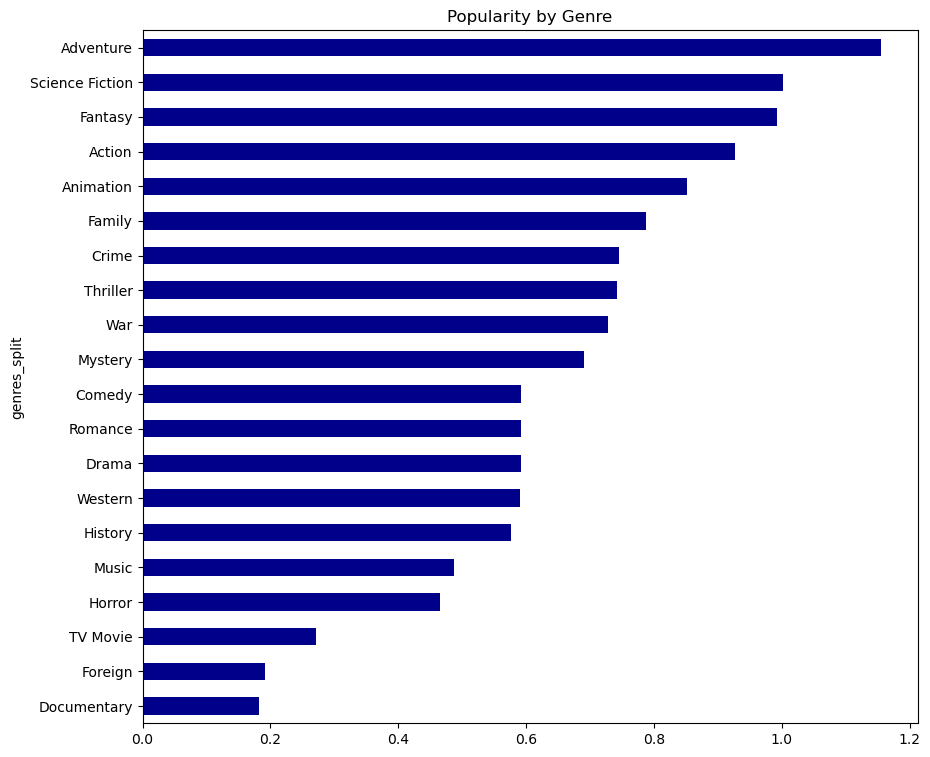

In [71]:
genres_avg['popularity'].plot.barh(title = 'Popularity by Genre', color = 'DarkBlue',figsize = (10,9))

#### Research Questions (Q):

5. Which genres have highest number of movies with a voting avg. >=8?

In [73]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Action


In [74]:
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_zero = movies_genre[movies_genre['vote_average'] >= 8]

In [75]:
genres_vote = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)

In [76]:
genres_vote

,vote_average
genres_split,
Family,1
Action,2
Mystery,2
History,2
Fantasy,2
Adventure,2
War,2
Horror,3
Romance,3


<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

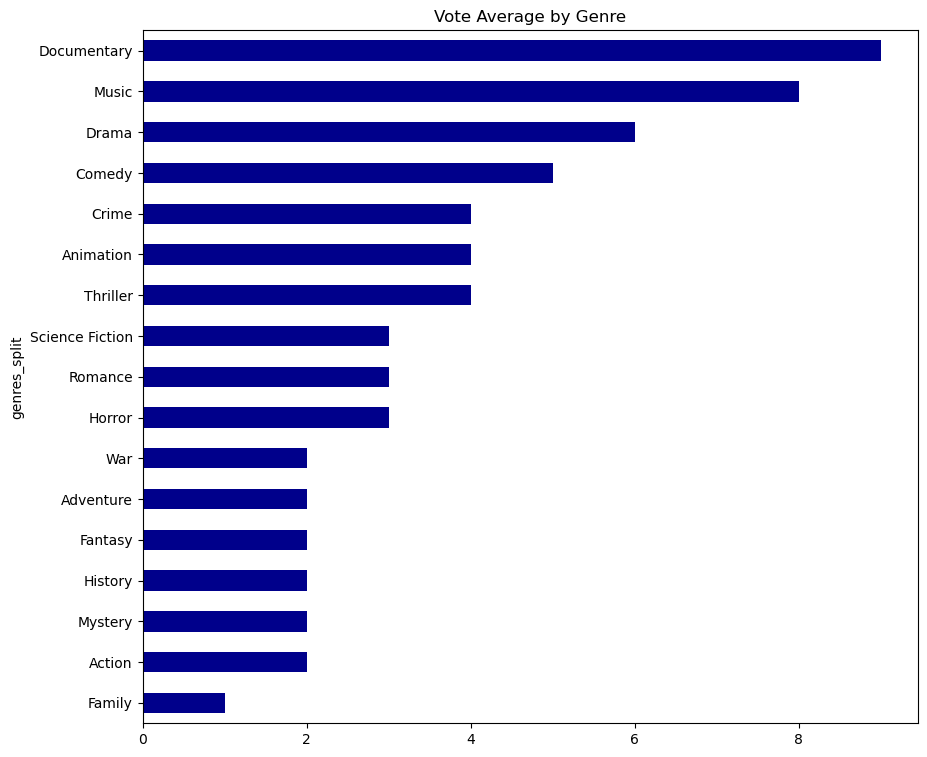

In [77]:
genres_vote['vote_average'].plot.barh(title = 'Vote Average by Genre', color = 'DarkBlue',figsize = (10,9))

#### Research Hypotheses (H):

1. The best movies according to vote avg. return high profit and revenue. 

In [83]:
movies.drop_duplicates(inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]

In [85]:
movies_counted = movies_genre[movies_genre['vote_count'] >= 50]

movies_counted.corr(method = 'spearman',numeric_only = True)

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


<Axes: xlabel='vote_average', ylabel='revenue'>

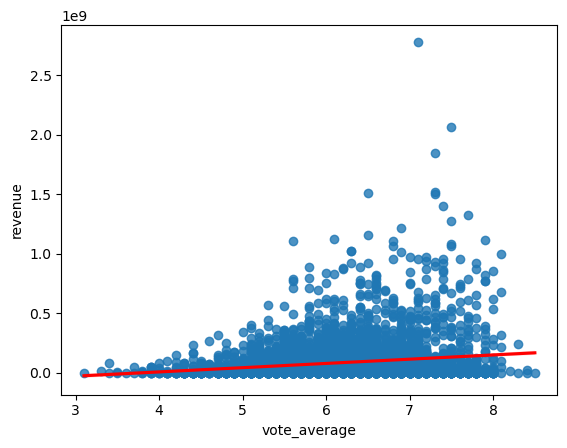

In [88]:
import seaborn as sns

sns.regplot(x = 'vote_average', y = 'revenue', data = movies_counted, line_kws = {"color": 'red'})

#### Research Hypotheses (H):

2. The best movies according to popularity return high profit and revenue. 

In [89]:
movies_counted.corr(method = 'spearman',numeric_only = True)

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


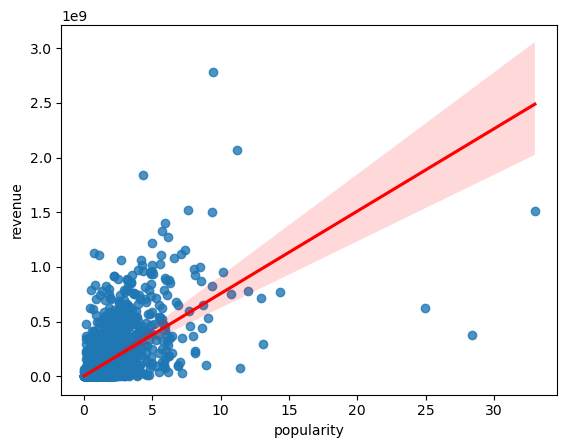

<Figure size 1000x500 with 0 Axes>

In [90]:
import matplotlib.pyplot as plt
sns.regplot(x = 'popularity', y = 'revenue', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,5))
plt.show()

#### Research Hypotheses (H):

3. Highly budgeted movies return high revenue and profit. 

In [91]:
movies_counted.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


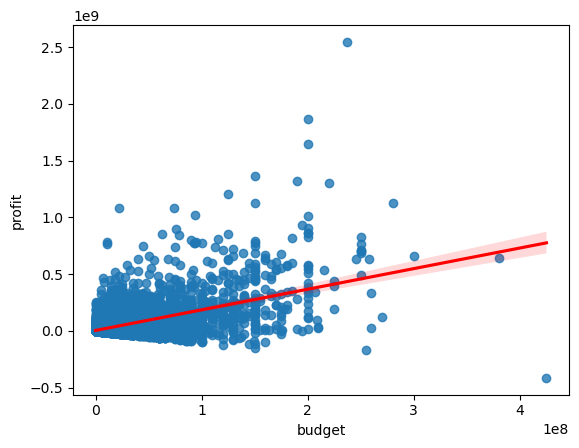

<Figure size 1000x500 with 0 Axes>

In [92]:
sns.regplot(x = 'budget', y = 'profit', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,5))
plt.show()

#### Research Hypotheses (H):

4. Highly budged movies have a high popularity. 

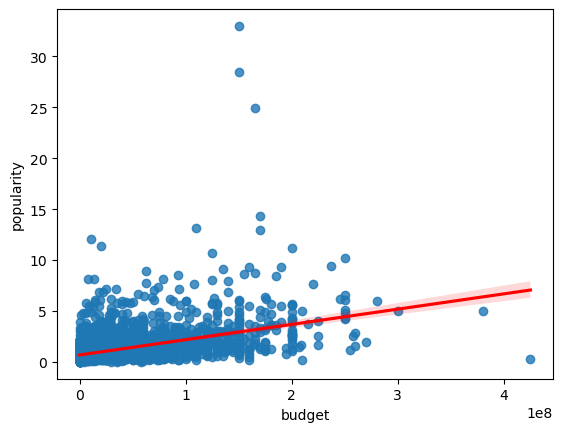

<Figure size 1000x500 with 0 Axes>

In [93]:
sns.regplot(x = 'budget', y = 'popularity', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,5))
plt.show()